In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Базовая работа с изображением

In [16]:
image = cv2.imread('sar_2_color.jpg')

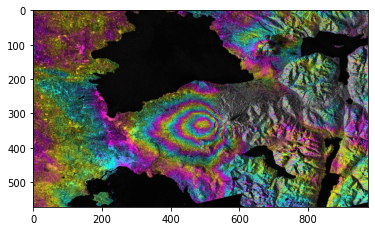

In [17]:
plt.imshow(image)

In [18]:
image.shape # h,w,c

(572, 974, 3)

In [19]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [20]:
# ROI
img_roi = image[100:200, 500:700]

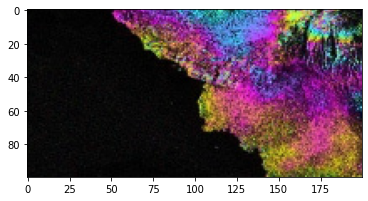

In [21]:
plt.imshow(img_roi)

In [22]:
b,g,r = cv2.split(image)

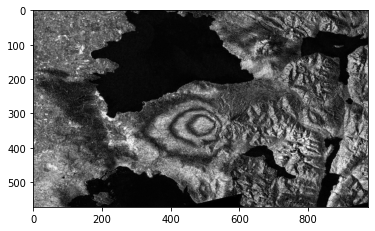

In [23]:
plt.imshow(b, cmap = 'gray')

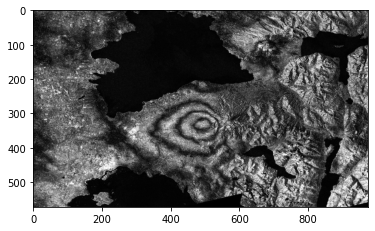

In [24]:
plt.imshow(g, cmap = 'gray')

In [25]:
# alternative approach
b = image[:,:,0]

In [26]:
import copy

image2 = copy.deepcopy(image)

In [27]:
image2[50:100,50:100] = [0,0,0]

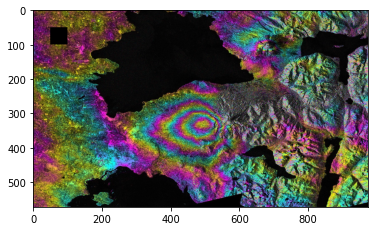

In [28]:
plt.imshow(image2)

In [29]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

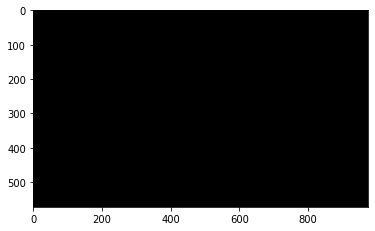

In [30]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [31]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [32]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [33]:
image_gray[0,0]

40

In [34]:
image_gray.shape

(572, 974)

In [35]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [36]:
image_hsv.shape

(572, 974, 3)

In [37]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [38]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [39]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [40]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [67]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

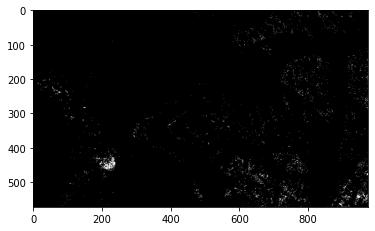

In [68]:
plt.imshow(thresh1, cmap='gray')

In [43]:
thresh1[thresh1==100].sum()

0

# Построение гистограммы

In [44]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

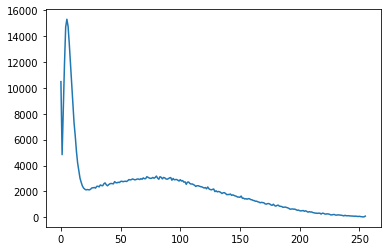

In [45]:
plt.plot(b_hist)

In [46]:
b_hist_cum = b_hist.cumsum()

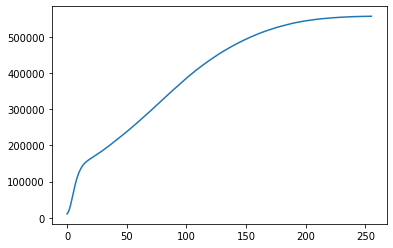

In [47]:
plt.plot(b_hist_cum)

In [49]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

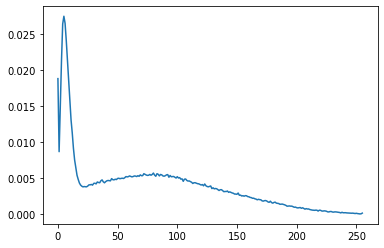

In [50]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [53]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


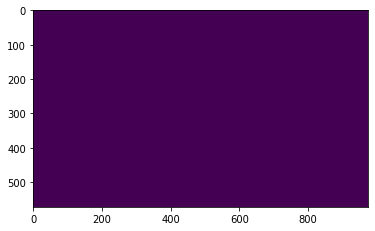

In [54]:
plt.imshow(diff)

In [55]:
mse = mean_squared_error(image_gray, image_gray)
mse

0.0

# Статистические характеристики изображений

In [56]:
mean = image_gray.mean()

In [57]:
std = image_gray.std()

In [58]:
print(mean,std)

67.41225535245043 52.016191875959635


In [60]:
eq_gray = cv2.equalizeHist(image_gray)

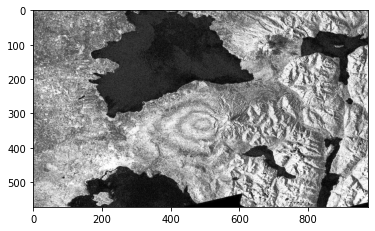

In [63]:
plt.imshow(eq_gray, cmap="gray")


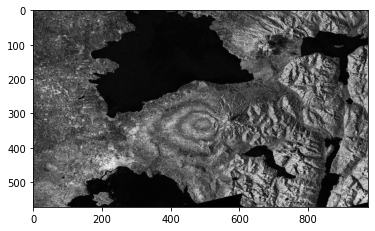

In [64]:
plt.imshow(image_gray, cmap="gray")

In [ ]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат
